# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city
   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portland
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | vilyuchinsk
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | alghero
Processing Record 11 of Set 1 | fort bragg
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | bel ombre
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | bang saphan
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | mpika
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | mossel

Processing Record 42 of Set 4 | dehui
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | karukh
Processing Record 45 of Set 4 | revda
Processing Record 46 of Set 4 | kapit
Processing Record 47 of Set 4 | nampula
Processing Record 48 of Set 4 | itaituba
Processing Record 49 of Set 4 | berezovyy
Processing Record 0 of Set 5 | likasi
Processing Record 1 of Set 5 | kirakira
Processing Record 2 of Set 5 | nogliki
Processing Record 3 of Set 5 | bacuyangan
Processing Record 4 of Set 5 | calbuco
Processing Record 5 of Set 5 | nevel'sk
Processing Record 6 of Set 5 | paso de carrasco
Processing Record 7 of Set 5 | sao miguel do araguaia
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | itoman
Processing Record 10 of Set 5 | juneau
Processing Record 11 of Set 5 | chotila
Processing Record 12 of Set 5 | charlestown
Processing Record 13 of Set 5 | vila velha
Processing Record 14 of Set 5 | new norfolk
Processing Record 15 of Set 5 | touros
Processi

Processing Record 36 of Set 8 | ipua
Processing Record 37 of Set 8 | taruma
Processing Record 38 of Set 8 | datong
Processing Record 39 of Set 8 | mana
Processing Record 40 of Set 8 | callao
Processing Record 41 of Set 8 | toliara
Processing Record 42 of Set 8 | phan rang-thap cham
Processing Record 43 of Set 8 | shingu
Processing Record 44 of Set 8 | lae
Processing Record 45 of Set 8 | coronel suarez
Processing Record 46 of Set 8 | saint-louis
Processing Record 47 of Set 8 | dunedin
Processing Record 48 of Set 8 | polyarnyy
Processing Record 49 of Set 8 | gond-pontouvre
Processing Record 0 of Set 9 | whakatane
Processing Record 1 of Set 9 | pisco
Processing Record 2 of Set 9 | lensk
Processing Record 3 of Set 9 | sheregesh
Processing Record 4 of Set 9 | montepuez
Processing Record 5 of Set 9 | guajara mirim
Processing Record 6 of Set 9 | port saint john's
Processing Record 7 of Set 9 | markala
Processing Record 8 of Set 9 | sinabang
Processing Record 9 of Set 9 | waddan
Processing Rec

Processing Record 22 of Set 12 | coahuayana de hidalgo
Processing Record 23 of Set 12 | happy valley-goose bay
Processing Record 24 of Set 12 | sorong
Processing Record 25 of Set 12 | sinop
Processing Record 26 of Set 12 | burang
Processing Record 27 of Set 12 | dubbo
Processing Record 28 of Set 12 | kudahuvadhoo
Processing Record 29 of Set 12 | sitka
Processing Record 30 of Set 12 | ceelbuur
Processing Record 31 of Set 12 | naracoorte
Processing Record 32 of Set 12 | flying fish cove
-----------------------------
Data Retrieval Complete      
-----------------------------


In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,portland,45.5234,-122.6762,59.14,73,100,5.01,US,1683330154
1,blackmans bay,-43.0167,147.3167,48.52,71,11,4.70,AU,1683330316
2,lompoc,34.6391,-120.4579,67.78,65,40,11.99,US,1683330194
3,vilyuchinsk,52.9306,158.4028,43.07,92,100,3.62,RU,1683330316
4,ushuaia,-54.8000,-68.3000,47.86,57,0,20.71,AR,1683330317


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portland,45.5234,-122.6762,59.14,73,100,5.01,US,1683330154
1,blackmans bay,-43.0167,147.3167,48.52,71,11,4.70,AU,1683330316
2,lompoc,34.6391,-120.4579,67.78,65,40,11.99,US,1683330194
3,vilyuchinsk,52.9306,158.4028,43.07,92,100,3.62,RU,1683330316
4,ushuaia,-54.8000,-68.3000,47.86,57,0,20.71,AR,1683330317


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

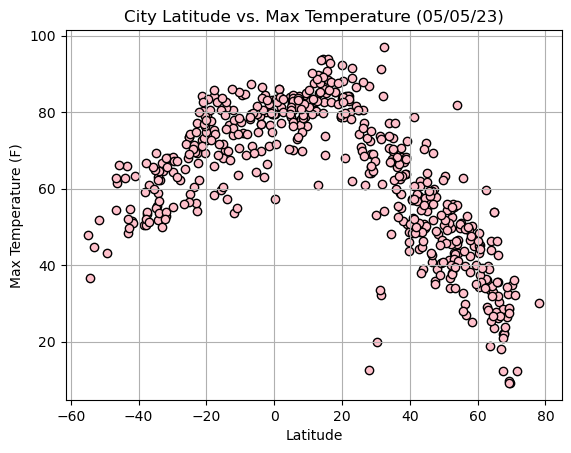

In [49]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolors="black",facecolors="pink")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

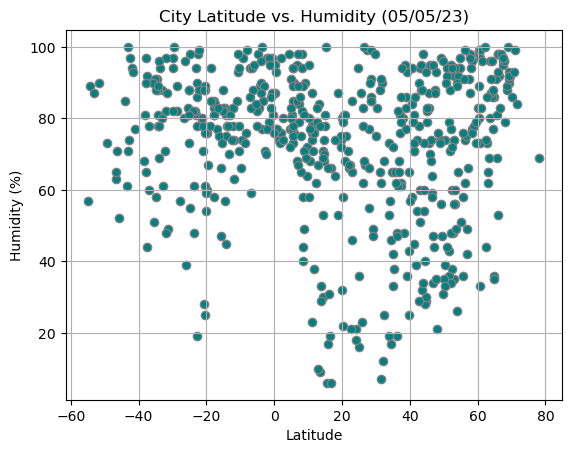

In [47]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolors="grey",facecolors="teal")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

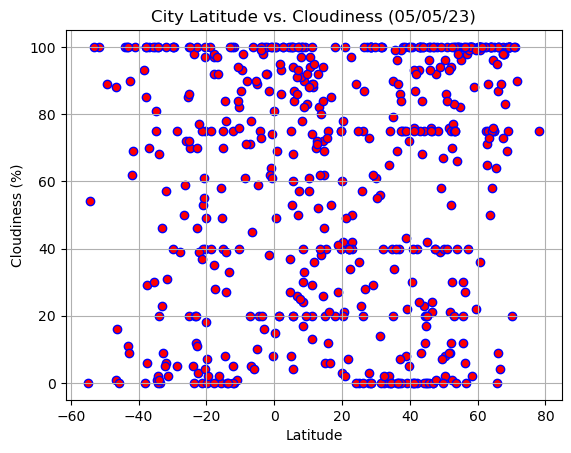

In [52]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolors="blue",facecolors="red")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

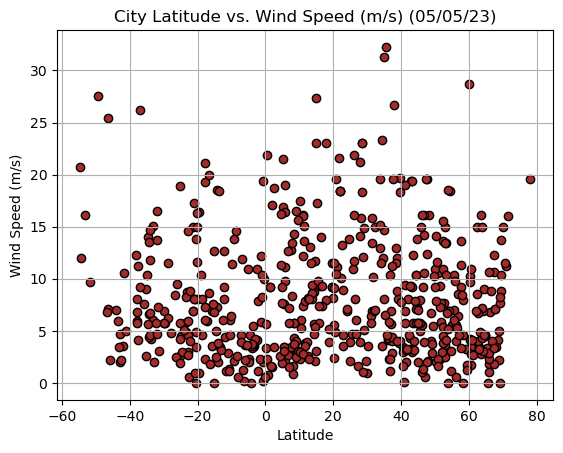

In [56]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolors="black",facecolors="brown")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (m/s) ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
CorCalc=round(linregress(city_data_df["Lat"],city_data_df["Max Temp"])[0],2)

line=linregress(city_data_df["Lat"],city_data_df["Max Temp"])
line

LinregressResult(slope=-0.3010018716785547, intercept=68.37353445414819, rvalue=-0.535298882040204, pvalue=9.139450613305104e-43, stderr=0.02012466165959757, intercept_stderr=0.7570349443683887)

In [66]:
slope = -0.3010018716785547
intercept = 68.37353445414819

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portland,45.5234,-122.6762,59.14,73,100,5.01,US,1683330154
2,lompoc,34.6391,-120.4579,67.78,65,40,11.99,US,1683330194
3,vilyuchinsk,52.9306,158.4028,43.07,92,100,3.62,RU,1683330316
9,alghero,40.5589,8.3181,57.29,94,0,3.44,IT,1683330318
10,fort bragg,35.1390,-79.0060,73.13,42,20,8.05,US,1683330318


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,48.52,71,11,4.70,AU,1683330316
4,ushuaia,-54.8000,-68.3000,47.86,57,0,20.71,AR,1683330317
5,saint-pierre,-21.3393,55.4781,72.57,78,0,6.91,RE,1683330317
6,puerto ayora,-0.7393,-90.3518,79.56,97,74,1.99,EC,1683330317
7,port alfred,-33.5906,26.8910,62.19,94,0,4.21,ZA,1683330043


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8647735578685664


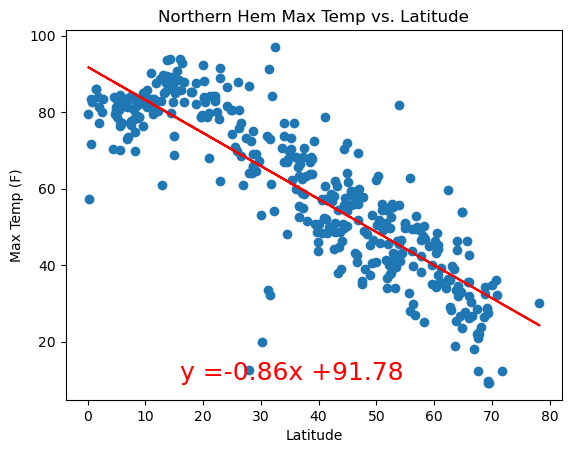

In [79]:
# Linear regression on Northern Hemisphere
x_line = pd.to_numeric(north_hem_df['Lat']).astype(float)
y_line = pd.to_numeric(north_hem_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress = x_line * slope + intercept
line_equ = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_line,y_line)
plt.plot(x_line,regress,"r-")
plt.annotate(line_equ, (16,10),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hem Max Temp vs. Latitude")

print(f"The r-value is: {rvalue}")
      
plt.savefig("output_data/Fig5.png")
plt.show()

The r-value is: 0.7386305952458782


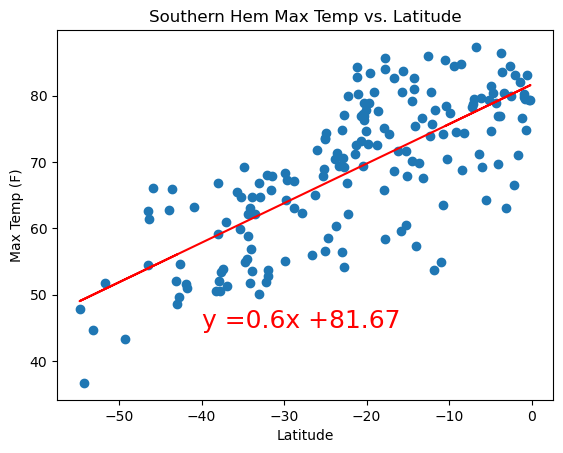

In [81]:
# Linear regression on Southern Hemisphere
x_line = pd.to_numeric(south_hem_df['Lat']).astype(float)
y_line = pd.to_numeric(south_hem_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress = x_line * slope + intercept
line_equ = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_line,y_line)
plt.plot(x_line,regress,"r-")
plt.annotate(line_equ, (-40,45),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hem Max Temp vs. Latitude")

print(f"The r-value is: {rvalue}")
      
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** It is apparant, after running the scatterplots for both the norhtern and southern hemispheres, that there is a correlation between lattitude and the temperature. For a latitude closer to and away from zero towards the negatives, the temperature drops. It is the oppisite for the latitude moving above zero, found in the norhtern hemisphere. Those tempuratures appear to increase the higher above zero latitude becomes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


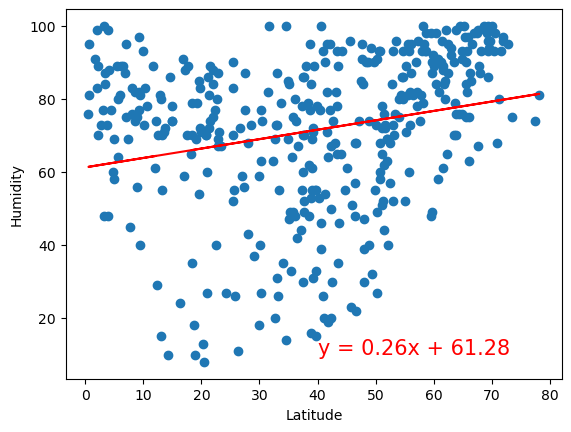

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


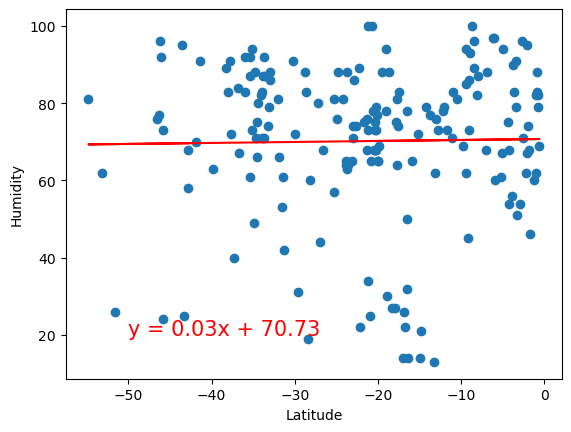

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


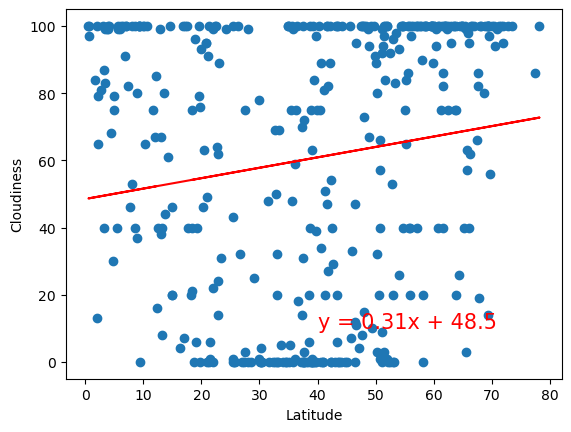

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


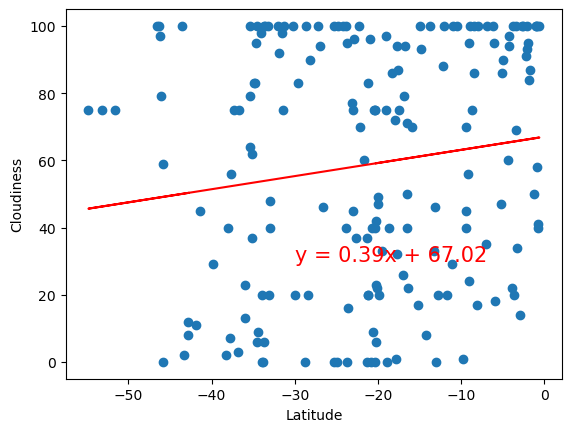

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


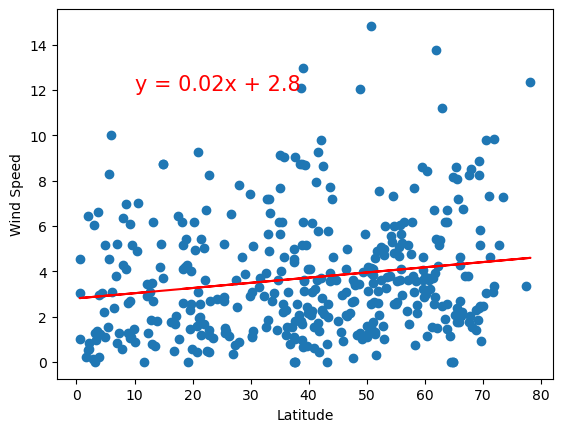

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


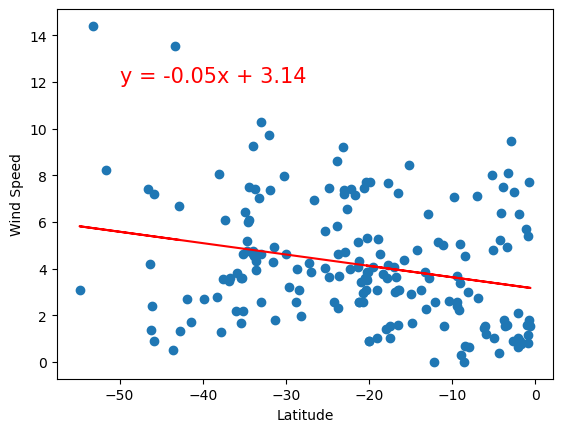

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE